# Week 8 Notes

## Color plots

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### plt.imshow

In [2]:
A = np.array([[1,2,3],[4,5,6],[7,8,9]])
print(A)

[[1 2 3]
 [4 5 6]
 [7 8 9]]


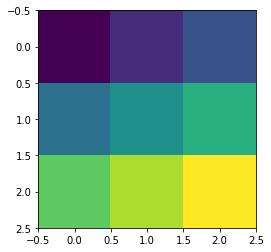

In [3]:
plt.imshow(A)
plt.show()

In [5]:
B = (A-np.min(A))/np.max(A-np.min(A))
print(B)

[[0.    0.125 0.25 ]
 [0.375 0.5   0.625]
 [0.75  0.875 1.   ]]


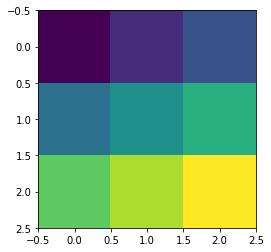

In [6]:
plt.imshow(B)
plt.show()

### Color maps

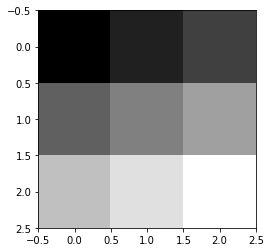

In [7]:
plt.imshow(B,cmap='gray')
plt.show()

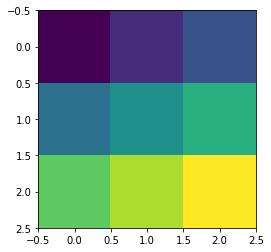

In [8]:
plt.imshow(B,cmap='viridis')
plt.show()

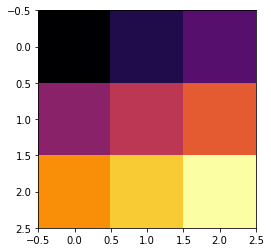

In [9]:
plt.imshow(B,cmap='inferno')
plt.show()

### Interpolation

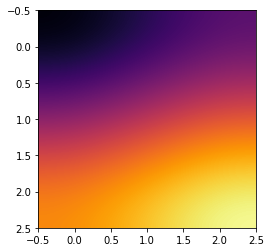

In [11]:
plt.imshow(B,cmap='inferno',interpolation='bicubic')
plt.show()

## RGB Colors

In other applications
* (255,0,0) is red
* (0,255,0) is green
* (0,0,255) is blue
* (0,0,0)   is black
* (255,255,255) is white

In python
* (1,0,0) is red
* (0,1,0) is green
* (0,0,1) is blue
* (0,0,0) is black
* (1,1,1) is white

### 3D arrays

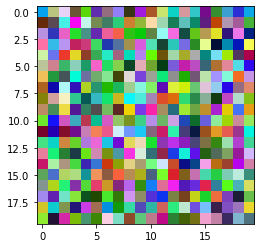

In [12]:
C = np.random.random((20,20,3))
plt.imshow(C)
plt.show()

#### Extracting the red components

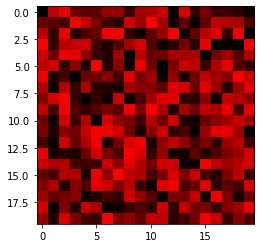

In [13]:
C_red = np.zeros((20,20,3))
C_red[:,:,0] = C[:,:,0]
plt.imshow(C_red)
plt.show()

#### Extracting the green components

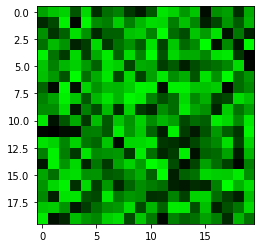

In [14]:
C_green = np.zeros((20,20,3))
C_green[:,:,1] = C[:,:,1]
plt.imshow(C_green)
plt.show()

#### Extracting the blue components

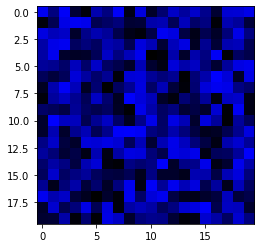

In [15]:
C_blue = np.zeros((20,20,3))
C_blue[:,:,2] = C[:,:,2]
plt.imshow(C_blue)
plt.show()

#### Putting the components back together

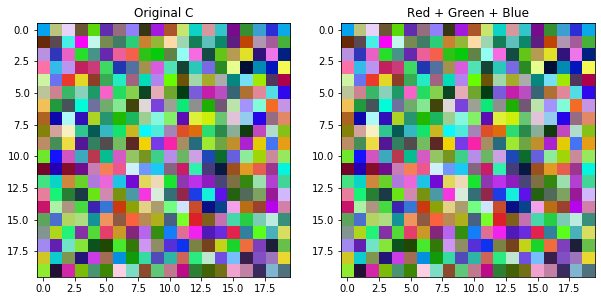

In [28]:
C_rgb = C_red+C_green+C_blue
plt.figure(figsize=(10,20))
plt.subplot(1,2,1)
plt.imshow(C)
plt.title('Original C')
plt.subplot(1,2,2)
plt.imshow(C_rgb)
plt.title('Red + Green + Blue')
plt.show()

#### Defining the Components separately

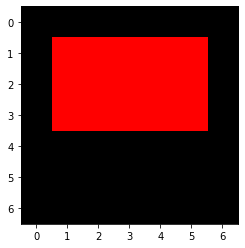

In [18]:
R = np.zeros((7,7,3))
R[1:4,1:6,0] = np.ones((3,5))
plt.imshow(R)
plt.show()

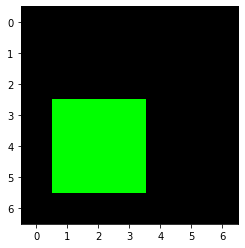

In [20]:
G = np.zeros((7,7,3))
G[3:6,1:4,1] = np.ones((3,3))
plt.imshow(G)
plt.show()

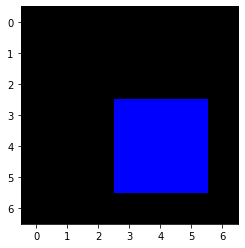

In [22]:
B = np.zeros((7,7,3))
B[3:6,3:6,2] = np.ones((3,3))
plt.imshow(B)
plt.show()

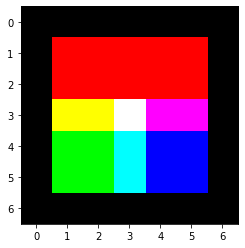

In [23]:
RGB = R+G+B
plt.imshow(RGB)
plt.show()

#### Defining the RGB components of each pixel individually

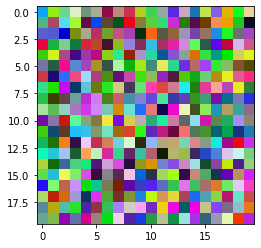

In [25]:
X = np.zeros((20,20,3))
for i,j in [(i,j) for i in range(20) for j in range(20)]:
    X[i,j,:] = np.random.random((1,1,3))
plt.imshow(X)
plt.show()

## Example Tartan

In [6]:
import numpy as np
import matplotlib.pyplot as plt

In [7]:
pattern = 'W2 K2 R6 K2 W2 K2 B10 R10 K2 W2 K2 B6 K2 W2'
color_dictionary = {'B' : [44, 44, 128],'K' : [16, 16, 16],'R' : [200, 0, 0],'W' : [224, 224, 224]}

In [12]:
color_dictionary['B']

[44, 44, 128]

In [18]:
tartan = make_tartan(pattern,color_dictionary,150)

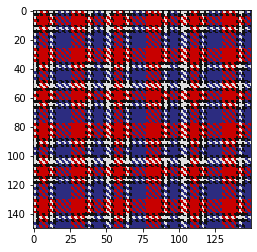

In [19]:
plt.imshow(tartan)
plt.show()

In [20]:
deconstruct_pattern(pattern)

[('W', 2),
 ('K', 2),
 ('R', 6),
 ('K', 2),
 ('W', 2),
 ('K', 2),
 ('B', 10),
 ('R', 10),
 ('K', 2),
 ('W', 2),
 ('K', 2),
 ('B', 6),
 ('K', 2),
 ('W', 2)]

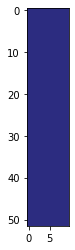

In [23]:
plt.imshow(build_stripe([44, 44, 128],10,52))
plt.show()

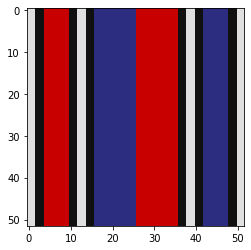

In [24]:
plt.imshow(build_vert(pattern,color_dictionary,52))
plt.show()

In [29]:
A = np.ones((10,4))
B = np.zeros((10,6))
C = np.concatenate([A,B],1)

In [27]:
print(C)

[[1. 1. 1. 1. 0. 0. 0. 0. 0. 0.]
 [1. 1. 1. 1. 0. 0. 0. 0. 0. 0.]
 [1. 1. 1. 1. 0. 0. 0. 0. 0. 0.]
 [1. 1. 1. 1. 0. 0. 0. 0. 0. 0.]
 [1. 1. 1. 1. 0. 0. 0. 0. 0. 0.]
 [1. 1. 1. 1. 0. 0. 0. 0. 0. 0.]
 [1. 1. 1. 1. 0. 0. 0. 0. 0. 0.]
 [1. 1. 1. 1. 0. 0. 0. 0. 0. 0.]
 [1. 1. 1. 1. 0. 0. 0. 0. 0. 0.]
 [1. 1. 1. 1. 0. 0. 0. 0. 0. 0.]]


In [30]:
help(np.transpose)

Help on function transpose in module numpy:

transpose(a, axes=None)
    Permute the dimensions of an array.
    
    Parameters
    ----------
    a : array_like
        Input array.
    axes : list of ints, optional
        By default, reverse the dimensions, otherwise permute the axes
        according to the values given.
    
    Returns
    -------
    p : ndarray
        `a` with its axes permuted.  A view is returned whenever
        possible.
    
    See Also
    --------
    moveaxis
    argsort
    
    Notes
    -----
    Use `transpose(a, argsort(axes))` to invert the transposition of tensors
    when using the `axes` keyword argument.
    
    Transposing a 1-D array returns an unchanged view of the original array.
    
    Examples
    --------
    >>> x = np.arange(4).reshape((2,2))
    >>> x
    array([[0, 1],
           [2, 3]])
    
    >>> np.transpose(x)
    array([[0, 2],
           [1, 3]])
    
    >>> x = np.ones((1, 2, 3))
    >>> np.transpose(x, (1, 0, 2)).s

In [32]:
np.transpose(C,(1,0))

array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [33]:
vert_stripes = build_vert(pattern,color_dictionary,52)

In [34]:
horiz_stripes = np.transpose(vert_stripes,(1,0,2))

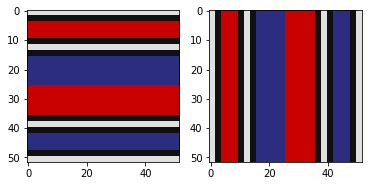

In [36]:
plt.subplot(1,2,1)
plt.imshow(horiz_stripes)
plt.subplot(1,2,2)
plt.imshow(vert_stripes)
plt.show()